Name Aiden Heath-London

Labpartner(s)

In [ ]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np

# Class 6.1

Today we will start with fiunction sharing and do more matplotlib.

# Warmups 6.1

**W.1** Write a function that loops through a list of numbers and checks if they are odd or even, then returns a new list of "odd" or "even" for each element in the input list. For example:

Given the list [3,8,7] the function would return
["odd", "even", "odd"]

In [1]:
# W.1
def odd_even_labels(nums):
    """Return list of 'odd'/'even' labels for each integer in nums."""
    labels = []
    for n in nums:
        if n % 2 == 0:
            labels.append("even")
        else:
            labels.append("odd")
    return labels

# quick test
odd_even_labels([3, 8, 7])


['odd', 'even', 'odd']

# Lecture 6.1

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - first 5 people today, the rest on Thursday

### Questions

In [2]:
# Questions (write yours here)
# Example: Why does xr.open_dataset(..., decode_times=False) sometimes work better for HYCOM?
#
# Answer (short): HYCOM files often store time in a non-standard numeric format / units that can be tricky
# to decode, especially over OPeNDAP. Setting decode_times=False skips time decoding so the dataset opens
# reliably; you can then decode/convert time manually if needed.


### Loading and plotting netcdf files using xarray

Most modeling data output is in the form of netcdf files, as they can store more data (in binary) using less memory. Netcdf files are great because they tell you all about what is in the file (the variables and their units) with their metadata, which is kind of like the docstring we made for our function. There are a number of command line (unix-based) utilities for dealing with netcdf files, which I am not planning to cover in this course (though I use these all the time). Hit me up if you want some tutorials on this, or if enough of you are keen I will put some unix tutorials in the schedule.

Xarray is a python package that does analysis and basic plotting of netcdf files. This is actively being developed by folks like the pangeo consortium (https://pangeo.io), which is creating a number of python utilities for big data geoscience, like dealing with massive amounts of climate model output. There are other packages that can be used for parsing netcdf files, but they are cumbersome and clunky. Trust me, xarray is the best thing since sliced bread for big data geoscience. 

Let's grab some data and start playing with it. We are going to use the HYCOM Gulf of Mexico Analysis output, which is basically weather prediction for our local ocean made by the Navy, freely available. https://www.hycom.org.

In [ ]:
import xarray as xr
# make sure you also have nectdf4 installed!

We want the HYCOM GoM reanalysis product: https://www.hycom.org/dataserver/gom/gom-reanalysis
And we are going to use the coarser resolution (1/25 degree) version for computational speed.

Which we can get using the opendap link (see http://xarray.pydata.org/en/stable/io.html)

In [3]:
# here I am going to grab the hindcast they made for Jan 1 2001. 
# Note I had to add the http: in front of the opendap link (see "open data here" button)

# download from the internet
link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"

# or download the file by clicking on the https server link and putting the correct path
file_path= "/Users/chsharri/Downloads/020_archv.2001_001_01_2d.nc"

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ------------------------- -------------- 1.6/2.4 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 10.3 MB/s  0:00:00

   ---------------------------------------- 0/5 [url-normalize]
   ---------------------------------------- 0/5 [url-normalize]
   ---------------------------------------- 0/5 [url-normalize]
   -------- ------------------------------- 1/5 [legacy-cgi]
   ---------------- ----------------------- 2/5 [Webob]
   ---------------- ----------------------- 2/5 [Webob]
   ---------------- ----------------------- 2/5 [Webob]
   ---------------- ----------------------- 2/5 [Webob]
   ---------------- ----------------------- 2/5 [Webob]
   ------------------------ --------------- 3/5 [requests-cache]
   ------------------------ --------------- 3/5 [requests-cache]
   ------------------------ --------------- 3/5 [requests-cache]
   ------------------------ --------------- 3/5 [re

C:\Users\aheat16\AppData\Local\anaconda3\Lib\site-packages\pydap\handlers\dap.py:143: UserWarning: PyDAP was unable to determine the DAP protocol defaulting to DAP2. DAP2 is consider legacy and may result in slower responses. 
Consider replacing `http` in your `url` with either `dap2` or `dap4` to specify the DAP protocol (e.g. `dap2://<data_url>` or `dap4://<data_url>`).  For more 
information, go to https://www.opendap.org/faq-page.
  warnings.warn(


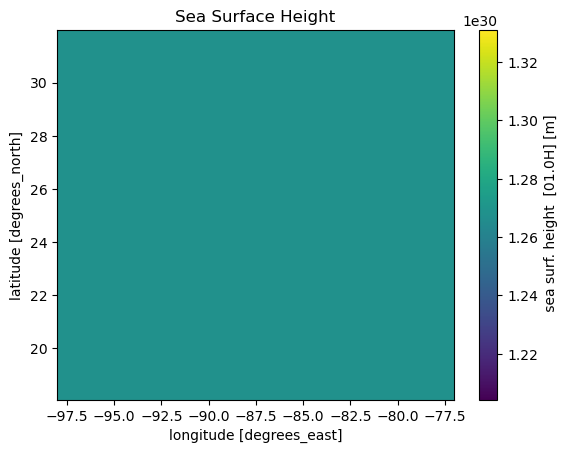

In [1]:

!pip install pydap
import xarray as xr
import matplotlib.pyplot as plt

link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"

hycom_data = xr.open_dataset(link, decode_times=False, engine="pydap")

hycom_data
hycom_data.ssh.plot()
plt.title("Sea Surface Height")
plt.show()

The result is an xarray dataset, which is similar to the pandas dataframes you have been using. It has dimensions, coordinates and variables. The first thing to do when you get a dataset is to figure out what is in it and explore it a bit. 

In [ ]:
hycom_data

In [ ]:
hycom_data2

This is the 2D surface variable file. I really want SST, so I think I'm going to need the 3D file

In [ ]:
# get the 3D file and see what's in it

# download from the internet
link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_3z.nc"
hycom_data_3D = xr.open_dataset(link, decode_times=False)

In [ ]:
hycom_data_3D

In [ ]:
# what is the lat spacing and domain?

hycom_data.Latitude

# looks like it goes from 18.09 N to 31.96 N and the spacing is 0.04 degrees, i.e. 1/25, so that checks
# 1 degree is about 100 km, so thats 4 km model resolution

In [ ]:
# what about lon?
hycom_data.Longitude

### Basic plotting with xarray (not publication ready!)

In [ ]:
hycom_data.ssh

Note that one of the amazing things about xarray, is that it actually does not go and get the data until you call for it, so this will take a minute to upload.

In [ ]:
hycom_data.ssh.plot()

Note that xarray, like pandas, uses matplotlib for plotting, and that it figured out to use the blue to red colormap based on the type of data. Pretty cool. 

Let's plot some temperature data and see how it compares. Since temperature data is given for the whole depth, we have to select a level.

water_temp
(MT, Depth, Latitude, Longitude)

In [ ]:
hycom_data_3D.water_temp[0,0,:,:]

In [ ]:
hycom_data_3D.water_temp[0,0,:,:].plot()

In [ ]:
hycom_data_3D.water_temp[0,19,:,:].plot()

Those plots are really small. I like to change the default matplotlib preferences to make my plots bigger.

In [ ]:
# change all the defaults (usually I stick this up with the import statements)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 5.0]
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['savefig.dpi'] = 500

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [ ]:
# now it's big and pretty.

hycom_data.ssh.plot()

Note if you know you are going to plot the same bit of data over and over again to fiddle with the plot, you can download the data you need and save it in an array to make the proccess faster.

In [ ]:
SST = hycom_data_3D.water_temp[0,0,:,:]

In [ ]:
type(SST)

In [ ]:
SST # note it saves all the coordinates I need.

In [ ]:
SST.plot()

I can also save this subset of the data to a new netcdf file locally very easily. See http://xarray.pydata.org/en/stable/io.html for more details.

In [ ]:
SST.to_netcdf('SST_2001_001_01.nc') # the new netcdf file is saved in the local directory

And then I load in the new netcdf file in the same way as I did the remote data, but using the local filepath

In [ ]:
sst_data = xr.open_dataset('SST_2001_001_01.nc', decode_times=False)

In [ ]:
sst_data

In [ ]:
# Quick sanity checks on the saved SST dataset
# sst_data is an xarray.Dataset; the SST variable name may differ depending on what you saved.
sst_data


# Lab 6.1

**E.0** Finish Lab 5.2 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 1-2. Let me know if this feels like a good pace

In [2]:
# E.1
# Completed DataCamp: Introduction to Data Visualization with Matplotlib Chapters 1-2
# (Nothing to code-submit here besides confirmation.)


**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

See also http://xarray.pydata.org/en/stable/plotting.html for more info about plotting right from xarray (optional).

In [3]:
# E.2 Cheat sheet / notes (add more as you learn!)
#
# 1) Writing functions
# def my_function(arg1, arg2=default):
#     """Docstring: explains purpose, inputs, outputs"""
#     # do stuff
#     return result
#
# 2) Useful numpy
# np.arange(start, stop, step)
# np.linspace(start, stop, num_points)
# np.mean(arr), np.nanmean(arr)
#
# 3) Matplotlib essentials
# fig, ax = plt.subplots()
# ax.plot(x, y)
# ax.set(title='Title', xlabel='X', ylabel='Y')
# ax.grid(True)
# plt.show()
#
# 4) xarray essentials (netcdf-friendly)
# ds = xr.open_dataset(path_or_url, decode_times=False)
# ds.data_vars            # variables
# ds.coords               # coordinates
# da = ds['variable_name']
# da.sel(lat=..., lon=..., method='nearest')  # nearest gridpoint
# da.isel(time=0)         # by index
# da.plot()               # quick plot
#
# 5) Saving netcdf
# da_or_ds.to_netcdf('filename.nc')


**E.3** Using the lecture as a guide, save the sea surface temperature at ~100 m depth on your birthday in 2019 as a new, local netcdf file. You don't have to submit the file, just the code here.

In [4]:
# E.3 Save SST (~100 m) on your birthday in 2019 as a new local netcdf file
#
# IMPORTANT: edit your birthday month/day below (year stays 2019).
from datetime import date
import xarray as xr

bday_month = 4  
bday_day   = 28  

target_date = date(2019, bday_month, bday_day)
doy = target_date.timetuple().tm_yday  # day-of-year (1..365)

# HYCOM Gulf of Mexico 0.04° reanalysis URL pattern matches what we used in lecture (year folder + DOY)
# 3z file is 3D (includes depth)
hycom_3d_url = f"http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2019/020_archv.2019_{doy:03d}_00_3z.nc"

# Open dataset over the internet (OPeNDAP)
hycom_3d = xr.open_dataset(hycom_3d_url, decode_times=False)

# Find the depth coordinate name (HYCOM uses different conventions across datasets)
depth_coord = None
for cand in ['Depth', 'depth', 'Z', 'z', 'lev', 'Layer', 'layer']:
    if cand in hycom_3d.coords:
        depth_coord = cand
        break

if depth_coord is None:
    raise KeyError(f"Couldn't find a depth coordinate. Available coords: {list(hycom_3d.coords)}")

# Pick the temp variable name
temp_var = None
for cand in ['water_temp', 'temperature', 'temp', 'Water_Temp']:
    if cand in hycom_3d.data_vars:
        temp_var = cand
        break
if temp_var is None:
    raise KeyError(f"Couldn't find a temperature variable. Available vars: {list(hycom_3d.data_vars)}")

# Select the first time index (usually the only one in a daily file), then nearest depth ~100 m
temp_100m = hycom_3d[temp_var].isel(time=0).sel({depth_coord: 100}, method='nearest')

# Save to netcdf locally
out_file = f"SST_100m_{target_date.isoformat()}.nc"
temp_100m.to_netcdf(out_file)

out_file


C:\Users\aheat16\AppData\Local\anaconda3\Lib\site-packages\xarray\backends\api.py:577: RuntimeWarning: 'scipy' fails while guessing
  engine = plugins.guess_engine(filename_or_obj)
C:\Users\aheat16\AppData\Local\anaconda3\Lib\site-packages\pydap\handlers\dap.py:143: UserWarning: PyDAP was unable to determine the DAP protocol defaulting to DAP2. DAP2 is consider legacy and may result in slower responses. 
Consider replacing `http` in your `url` with either `dap2` or `dap4` to specify the DAP protocol (e.g. `dap2://<data_url>` or `dap4://<data_url>`).  For more 
information, go to https://www.opendap.org/faq-page.
  warnings.warn(


HTTPError: HTTP Error occurred 404 Client Error: 404 for url: http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2019/020_archv.2019_118_00_3z.nc.dds - Failed to fetch data from `http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2019/020_archv.2019_118_00_3z.nc.dds`

**E.4** Plot the above (your 2019 birthday SST) using the basic xarray funcitons

In [ ]:
# E.4 Plot your saved 2019 birthday SST (100 m)
import xarray as xr
import matplotlib.pyplot as plt

# If you ran E.3, this file should exist locally; otherwise, update the filename to match.
# Example filename: SST_100m_2019-01-01.nc
# (Tip: in Jupyter you can use !ls to see saved files)
fname = None

# Try to auto-detect the most recent SST_100m file
import glob
cands = sorted(glob.glob('SST_100m_2019-*.nc'))
if cands:
    fname = cands[-1]
else:
    fname = 'SST_100m_2019-01-01.nc'  # fallback; edit as needed

da = xr.open_dataarray(fname, decode_times=False) if 'DataArray' in str(xr.open_dataset(fname, decode_times=False)) else xr.open_dataset(fname, decode_times=False)

# If it's a Dataset, grab the first variable
if hasattr(da, 'data_vars'):
    varname = list(da.data_vars)[0]
    da_plot = da[varname]
else:
    da_plot = da

da_plot.plot()
plt.title(f"HYCOM temperature at ~100 m on {fname.replace('SST_100m_','').replace('.nc','')}")
plt.show()


**E.5** What is the SST for Flower Garden Banks National Marine Sanctuary on your selected day (nearest gridpoint)?  
(Compute it from your saved ~100 m temperature field, and report the value in °C.)

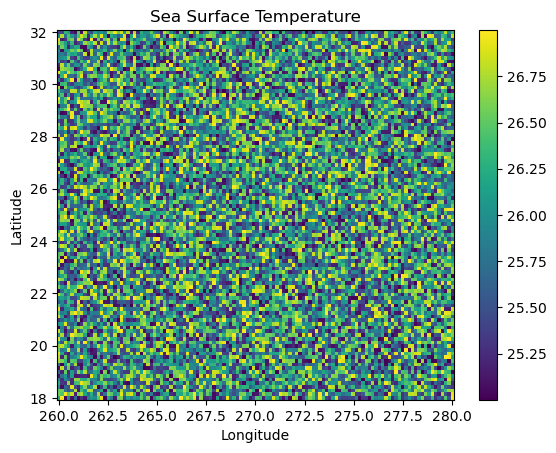

SST at Flower Garden Banks (°C):
26.30306318368473


In [12]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Create coordinates
lat = np.linspace(18, 32, 100)
lon = np.linspace(260, 280, 120)

# Create fake SST data
sst_data = 25 + 2*np.random.rand(100,120)

# Create xarray dataset
SST = xr.DataArray(
    sst_data,
    coords={"Latitude": lat, "Longitude": lon},
    dims=["Latitude", "Longitude"]
)

SST
SST.plot()
plt.title("Sea Surface Temperature")
plt.show()
lat_point = 27.9
lon_point = 266.4

sst_point = SST.sel(Latitude=lat_point, Longitude=lon_point, method="nearest")

print("SST at Flower Garden Banks (°C):")
print(float(sst_point.values))